<a href="https://colab.research.google.com/github/PushkarGupta007/Calculator/blob/main/eda_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**In this handbook, we will implement EDA on a wheat seed dataset that contains seven features for three different types of wheat kernels: (Kama, Rosa, Canadian). Because it helps us reveal the basic structure, patterns, and relationships of our data set. Then we will construct a decision tree to determine the features by which to classify the wheat kernels.**

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the data from a CSV file into a Pandas DataFrame**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seeds.csv')
dataset.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Exploring Data

**Descriptive Statistics**

In [ ]:
dataset.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


**Show information about the dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
dataset.shape

(199, 8)

# Cleaning Data

**Replace header column names and the values of category to a more meaningfull names**

In [ ]:
dataset.columns=['Area', 'Perimeter', 'Compactness', 'Kernel_Length','Kernel_Width', 'Asymmetry_Coeff','Kernel_Groove' , 'Category']
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
dataset["Category"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


**Get Classes to predict**

In [ ]:
dataset['Category'].unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

**Check for duplicates**

In [ ]:
sum(dataset.duplicated())

0

**Check for missing values**

In [ ]:
dataset.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Category           0
dtype: int64

# Data Visualization

**Plot the number of categories of wheat seeds**

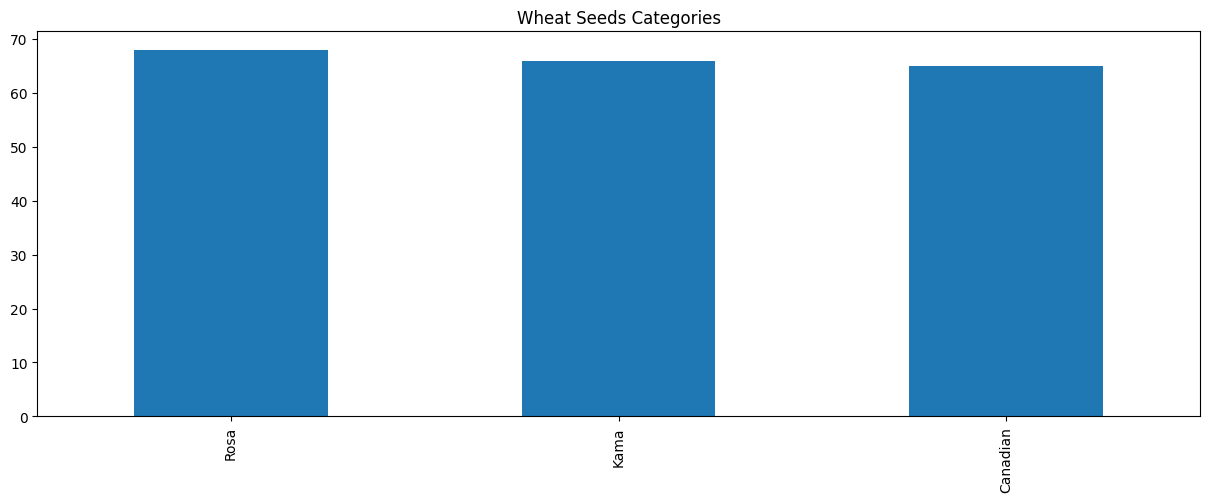

In [ ]:
dataset['Category'].value_counts().plot(kind='bar', title='Wheat Seeds Categories', figsize=(15,5))
plt.show()

In [ ]:
dataset.columns=['Area', 'Perimeter', 'Compactness', 'Kernel_Length','Kernel_Width', 'Asymmetry_Coeff','Kernel_Groove' , 'Category']
dataset.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


**Show the correlation between the dataset features**

<ipython-input-26-feab00c89bf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


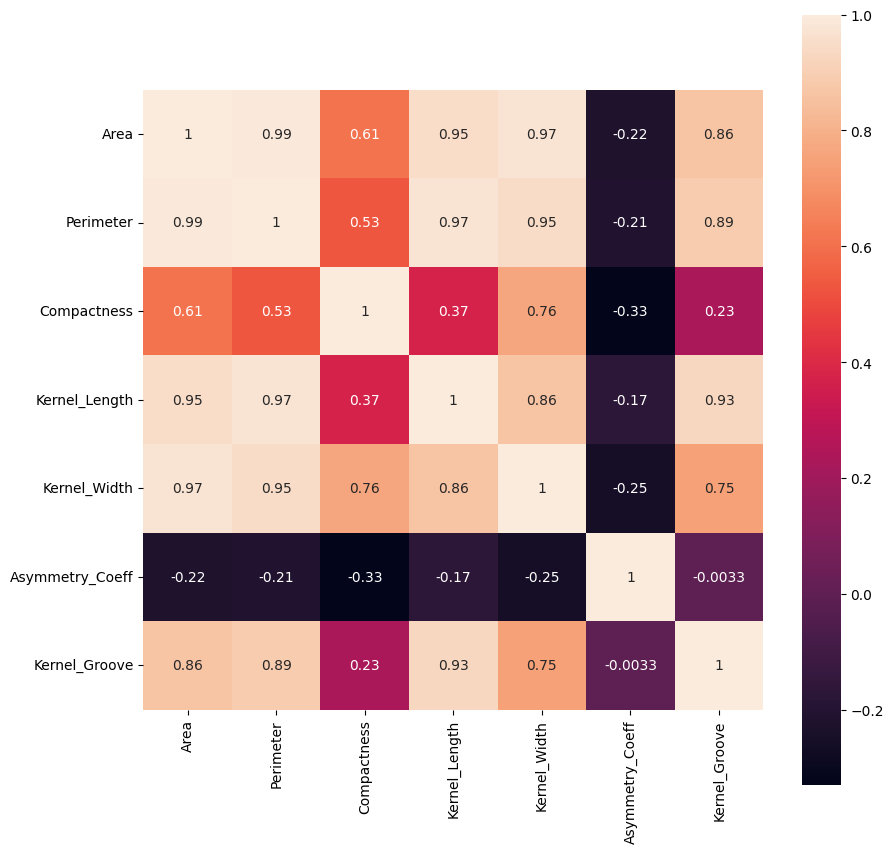

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True ,ax=ax)
plt.yticks(rotation=360)
plt.show()

**Show the different clusters distribution within our dataset**

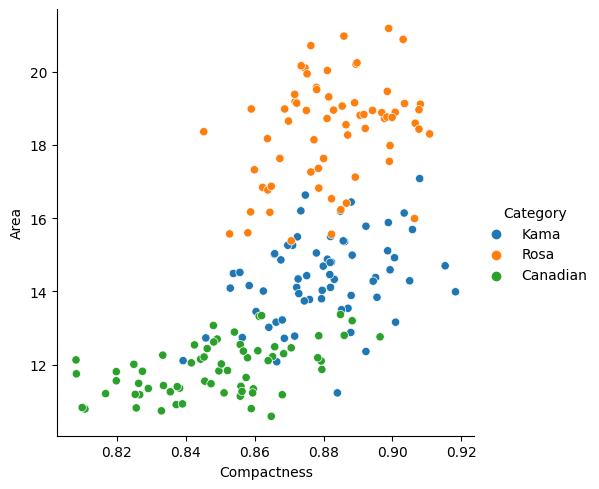

In [ ]:
sns.relplot(x='Compactness', y='Area', hue='Category', data=dataset);


**Check dataset outliers**

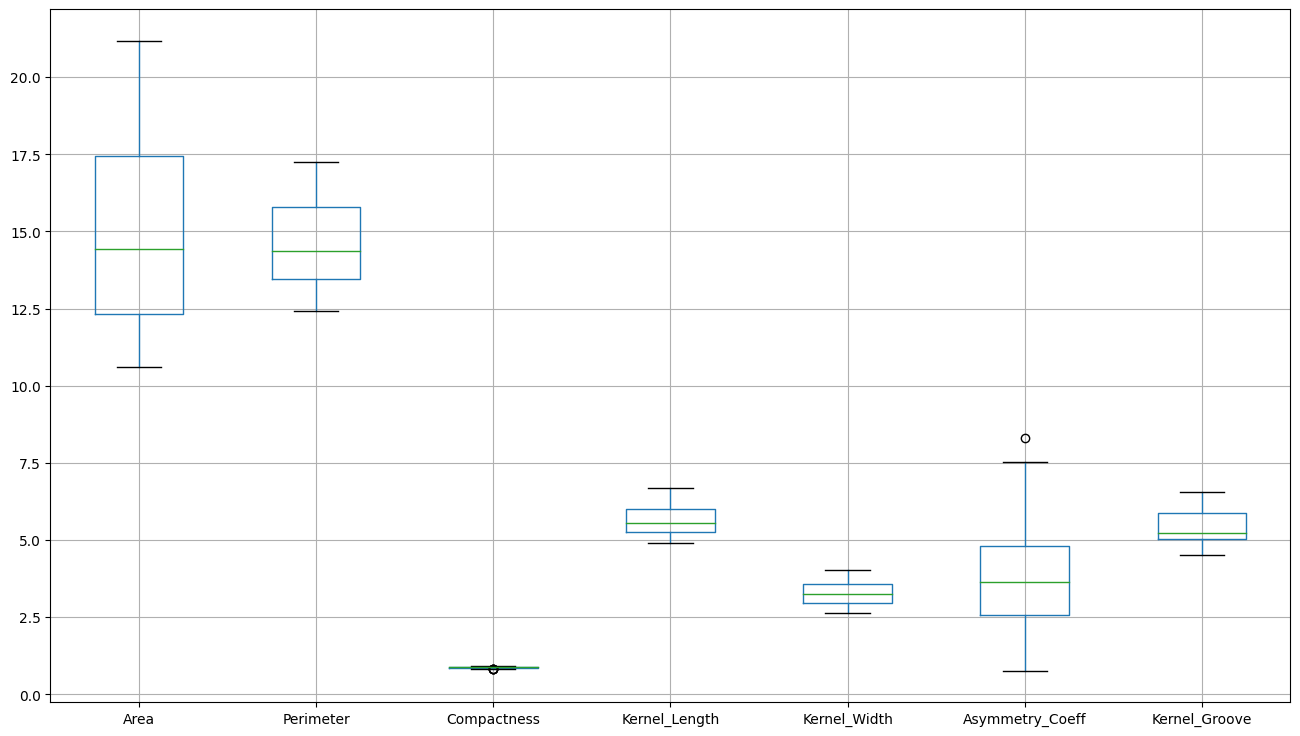

In [ ]:
dataset.boxplot(figsize=(16,9));

# Prepare data for decision tree training

**Extracting data features**

In [ ]:
x = dataset.iloc[:, 0:7]
x.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Extracting class labels**

In [ ]:
y = dataset['Category']
y.head()

0    Kama
1    Kama
2    Kama
3    Kama
4    Kama
Name: Category, dtype: object

**Splitting the Dataset into Train and Test using the train_test_split**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=50, test_size = 0.25)

# Decision tree classification

**Creat the Decision tree classifier from the sklearn library.**

In [ ]:
clf = DecisionTreeClassifier( min_samples_split=50 , criterion = 'entropy' )


**Fit the Decision Tree with the training dataset.**

In [ ]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

**Make Prediction using the test data**

In [ ]:
y_pred = clf.predict(x_test)

**Check Decision Tree Accuracy**

In [ ]:
print("Accuracy of Decision Tree Prediction:" + str(accuracy_score(y_true = y_test , y_pred = y_pred)))

Accuracy of Decision Tree Prediction:0.88


In [ ]:
!pip install six

In [ ]:
!pip install pydotplus

# Visualize our decision tree Structure

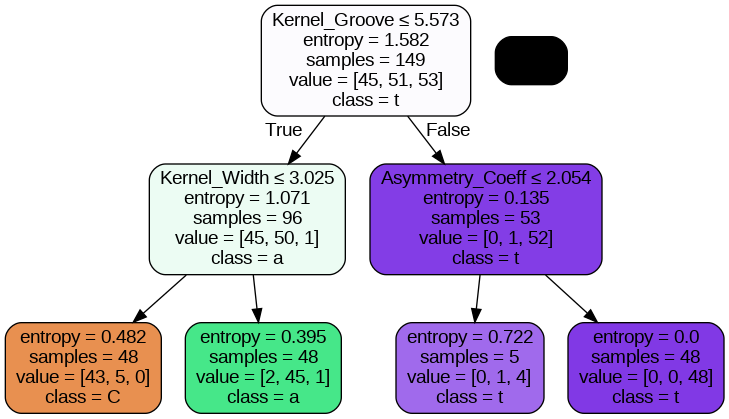

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Area','Perimeter','Compactness', 'Kernel_Length', 'Kernel_Width',
       'Asymmetry_Coeff', 'Kernel_Groove'],class_names= 'Category')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())